# Retail Orders Dataset Exploration & Analysis
## by Amna Helmy

> This dataset includes information about 2022 and 2023 global mart sales in United States.

## Preliminary Wrangling

In [3]:
# import all needed packages 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load the dataset
Retail_orders= pd.read_csv("Retail Orders.csv")

In [7]:
# overview of data shape and composition
print(Retail_orders.shape)
print(Retail_orders.info())

(9994, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB
Non

In [9]:
Retail_orders.sample(10)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
3110,3111,2022-06-10,Standard Class,Consumer,United States,Springfield,Missouri,65807,Central,Office Supplies,Paper,OFF-PA-10001934,40,50,8,5
1185,1186,2022-06-04,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Storage,OFF-ST-10002344,390,490,6,2
9621,9622,2023-11-21,Standard Class,Home Office,United States,Lancaster,Ohio,43130,East,Technology,Accessories,TEC-AC-10002370,0,0,2,3
6143,6144,2022-12-28,Standard Class,Consumer,United States,Manchester,Connecticut,6040,East,Office Supplies,Art,OFF-AR-10002987,110,120,6,5
8069,8070,2022-01-31,Standard Class,Consumer,United States,Huntsville,Texas,77340,Central,Office Supplies,Storage,OFF-ST-10002743,420,450,5,3
3716,3717,2023-10-06,Standard Class,Home Office,United States,Omaha,Nebraska,68104,Central,Office Supplies,Fasteners,OFF-FA-10004395,20,20,5,3
8438,8439,2022-08-28,Standard Class,Consumer,United States,Seattle,Washington,98105,West,Office Supplies,Binders,OFF-BI-10003876,120,140,4,4
6702,6703,2022-09-16,Standard Class,Consumer,United States,Wilson,North Carolina,27893,South,Office Supplies,Binders,OFF-BI-10001031,10,10,4,2
5990,5991,2022-04-01,Standard Class,Consumer,United States,Los Angeles,California,90049,West,Office Supplies,Binders,OFF-BI-10004390,1980,2360,7,5
515,516,2022-01-04,Standard Class,Home Office,United States,Great Falls,Montana,59405,West,Technology,Copiers,TEC-CO-10003236,2430,3000,5,5


In [11]:
#Checking if there are Null Values
Retail_orders.isnull().sum()

Order Id            0
Order Date          0
Ship Mode           1
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

In [13]:
Retail_orders['Ship Mode'].value_counts()

Ship Mode
Standard Class    5962
Second Class      1945
First Class       1538
Same Day           543
Not Available        4
unknown              1
Name: count, dtype: int64

In [15]:
# Removing Not Avaiable, unknown & nan rows
Retail_orders[Retail_orders['Ship Mode'] == 'unknown']
Retail_orders[Retail_orders['Ship Mode'] == 'Not Available']
Retail_orders.dropna(inplace=True)
Retail_orders = Retail_orders.loc[(~Retail_orders['Ship Mode'].isin(['Not Available', 'unknown'])) & (~Retail_orders['Ship Mode'].isna())]
Retail_orders['Ship Mode'].value_counts()

Ship Mode
Standard Class    5962
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [17]:
Retail_orders.shape

(9988, 16)

In [19]:
# checking Duplication
Retail_orders.duplicated().sum()

0

In [21]:
# Removing unnecessary columns
Retail_orders = Retail_orders.drop(['Postal Code','Product Id','Country'], axis=1)

In [23]:
#changing dtype of order date from object to datetime dtype 
Retail_orders['Order Date'] = pd.to_datetime(Retail_orders['Order Date'])
Retail_orders['Order Date']

0      2023-03-01
1      2023-08-15
2      2023-01-10
3      2022-06-18
4      2022-07-13
          ...    
9989   2023-02-18
9990   2023-03-17
9991   2022-08-07
9992   2022-11-19
9993   2022-07-17
Name: Order Date, Length: 9988, dtype: datetime64[ns]

In [25]:
# create new columns for calculating Total Cost, Total sales, Revenues & net Profit
Retail_orders['Total_cost']= Retail_orders['cost price'] * Retail_orders['Quantity']

Retail_orders['Discount Percent'] = Retail_orders['Discount Percent'].astype(float)
Retail_orders['Total Sales']= Retail_orders['List Price'] * Retail_orders['Quantity']
Retail_orders['Total Revenues'] = Retail_orders['Total Sales'] - (Retail_orders['Total Sales'] * (Retail_orders['Discount Percent'] / 100))
Retail_orders['Net Profit'] = Retail_orders['Total Revenues'] - Retail_orders['Total_cost']

Retail_orders.head()

,Order Id,Order Date,Ship Mode,Segment,City,State,Region,Category,Sub Category,cost price,List Price,Quantity,Discount Percent,Total_cost,Total Sales,Total Revenues,Net Profit
0,1,2023-03-01,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,240,260,2,2.0,480,520,509.6,29.6
1,2,2023-08-15,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,600,730,3,3.0,1800,2190,2124.3,324.3
2,3,2023-01-10,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,10,10,2,5.0,20,20,19.0,-1.0
3,4,2022-06-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,780,960,5,2.0,3900,4800,4704.0,804.0
4,5,2022-07-13,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,20,20,2,5.0,40,40,38.0,-2.0


In [27]:
# descriptive statistics for the dataset
Retail_orders.describe()

,Order Id,Order Date,cost price,List Price,Quantity,Discount Percent,Total_cost,Total Sales,Total Revenues,Net Profit
count,9988.000000,9988,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,5000.484882,2022-12-29 08:30:56.948337920,201.061274,229.602523,3.788947,3.484081,1003.436123,1147.899479,1107.327423,103.891300
min,1.000000,2022-01-01 00:00:00,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,-40.000000
25%,2503.750000,2022-06-29 00:00:00,20.000000,20.000000,2.000000,2.000000,50.000000,50.000000,48.500000,-1.200000
50%,5000.500000,2022-12-27 12:00:00,50.000000,50.000000,3.000000,3.000000,160.000000,180.000000,174.600000,14.000000
75%,7497.250000,2023-07-03 00:00:00,180.000000,210.000000,5.000000,4.000000,660.000000,760.000000,731.500000,64.500000
max,9994.000000,2023-12-31 00:00:00,18110.000000,22640.000000,14.000000,5.000000,109330.000000,135840.000000,130406.400000,21746.400000
std,2883.457544,NaN,537.719406,623.211282,2.224712,1.114209,3345.529331,3897.336248,3751.964465,455.122224


## Analysis of Categories and Sub-Categories

          Category  Total_Sales  Total_Revenue  Net_Profit
0        Furniture      3841650      3705474.6    341094.6
1  Office Supplies      3546880      3423131.8    317381.8
2       Technology      4076690      3931379.9    379189.9


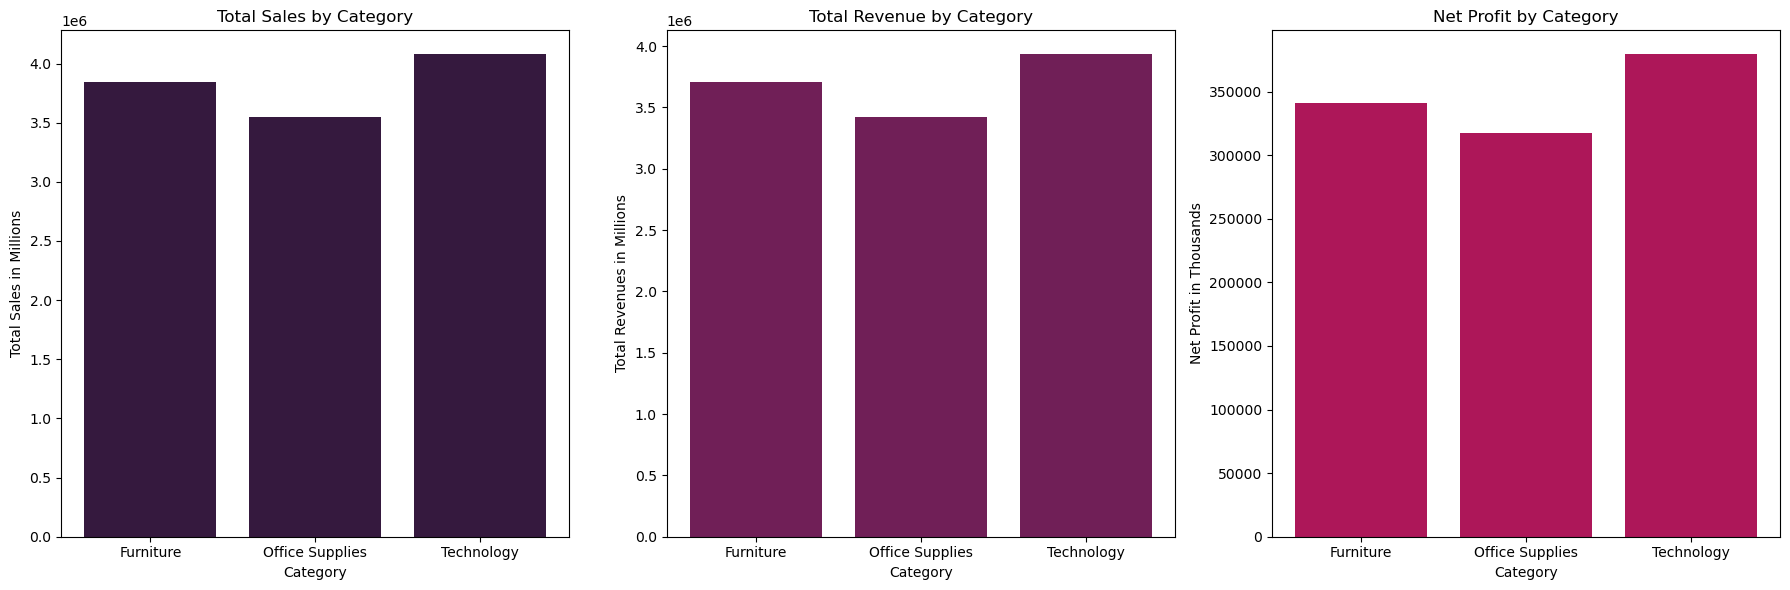

In [30]:
# Which product categories contribute the most to Total Sales, Total Revenues, Net Profit? 

# Group by 'Category' and calculate total sales, revenue, and profit
category_summary = Retail_orders.groupby('Category').agg(
    Total_Sales=('Total Sales', 'sum'),
    Total_Revenue=('Total Revenues', 'sum'),
    Net_Profit=('Net Profit', 'sum')
).reset_index()

print(category_summary)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = sns.color_palette('rocket')

# Total Sales by Category
axes[0].bar(category_summary['Category'], category_summary['Total_Sales'], color=colors[0])
axes[0].set_title('Total Sales by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Sales in Millions')

# Total Revenue by Category
axes[1].bar(category_summary['Category'], category_summary['Total_Revenue'], color=colors[1])
axes[1].set_title('Total Revenue by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Revenues in Millions')

# Net Profit by Category
axes[2].bar(category_summary['Category'], category_summary['Net_Profit'], color=colors[2])
axes[2].set_title('Net Profit by Category')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Net Profit in Thousands')

plt.tight_layout()
plt.show()

In [32]:
# What is the profit margin for different Categories?
# Calculate Profit Margin as (Net Profit / Total Revenues) * 100
Retail_orders['Profit Margin'] = (Retail_orders['Net Profit'] / Retail_orders['Total Revenues']) * 100

# Average Profit Margin by Category
avg_profit_margin_by_category = Retail_orders.groupby('Category')['Profit Margin'].mean().reset_index()
print(avg_profit_margin_by_category)

          Category  Profit Margin
0        Furniture       7.324816
1  Office Supplies       3.559626
2       Technology       8.272566


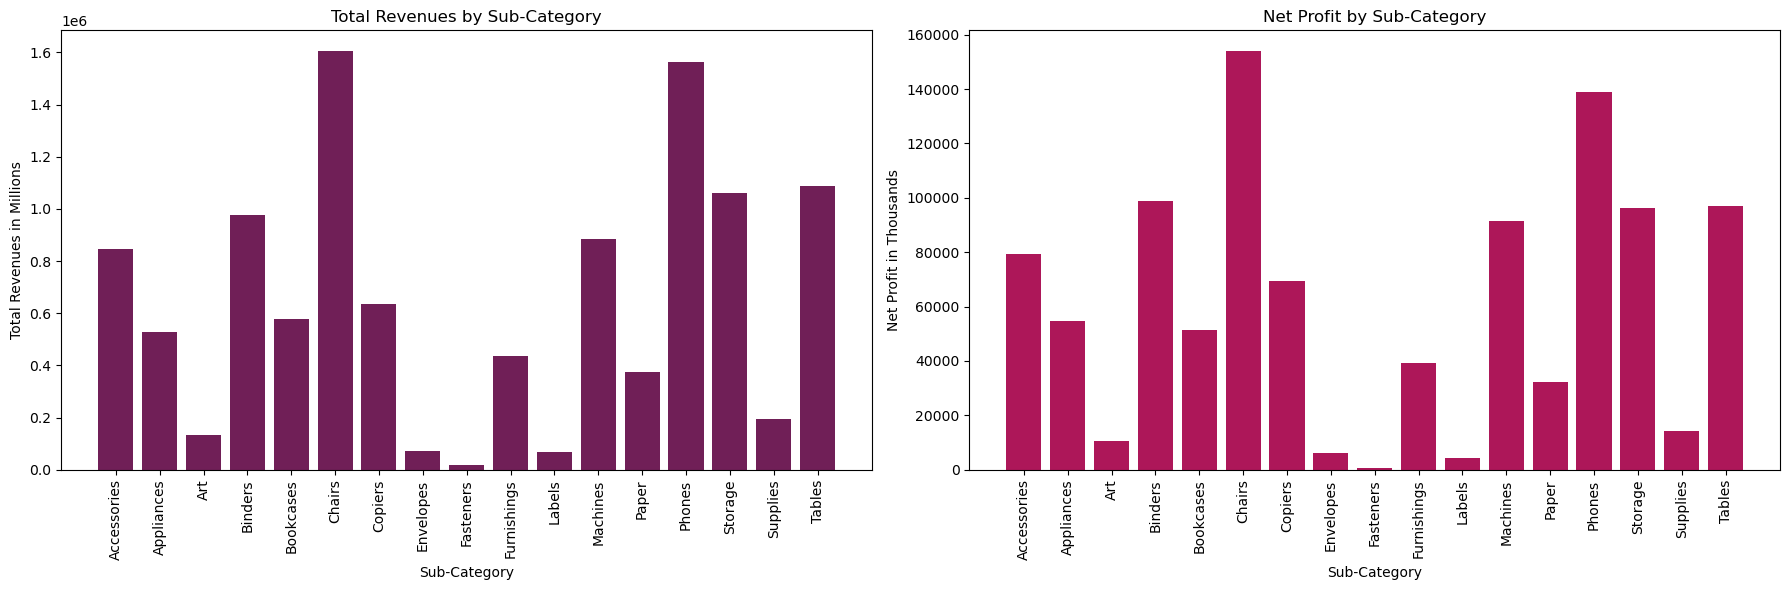

In [34]:
# Which product sub-categories contribute the most to Total Revenues, Net Profit? 

# Group by 'Sub Category' and calculate total revenue, and profit
subcategory_summary = Retail_orders.groupby('Sub Category').agg({'Total Revenues': 'sum', 'Net Profit': 'sum'}).reset_index()

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
colors = sns.color_palette('rocket')

# Total Revenue by Sub-Category
axes[0].bar(subcategory_summary['Sub Category'], subcategory_summary['Total Revenues'], color=colors[1])
axes[0].set_title('Total Revenues by Sub-Category')
axes[0].set_xlabel('Sub-Category')
axes[0].set_ylabel('Total Revenues in Millions')
axes[0].tick_params(axis='x', rotation=90)

# Net Profit by Sub-Category
axes[1].bar(subcategory_summary['Sub Category'], subcategory_summary['Net Profit'], color=colors[2])
axes[1].set_title('Net Profit by Sub-Category')
axes[1].set_xlabel('Sub-Category')
axes[1].set_ylabel('Net Profit in Thousands')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Top 5 Sub-Categories by Total Revenues:
    Sub Category  Total Revenues  Net Profit
5        Chairs       1604415.7    153905.7
13       Phones       1565047.7    138967.7
16       Tables       1087243.9     96823.9
14      Storage       1061125.3     96105.3
3       Binders        976192.0     98792.0

Top 5 Sub-Categories by Net Profit:
    Sub Category  Total Revenues  Net Profit
5        Chairs       1604415.7    153905.7
13       Phones       1565047.7    138967.7
3       Binders        976192.0     98792.0
16       Tables       1087243.9     96823.9
14      Storage       1061125.3     96105.3


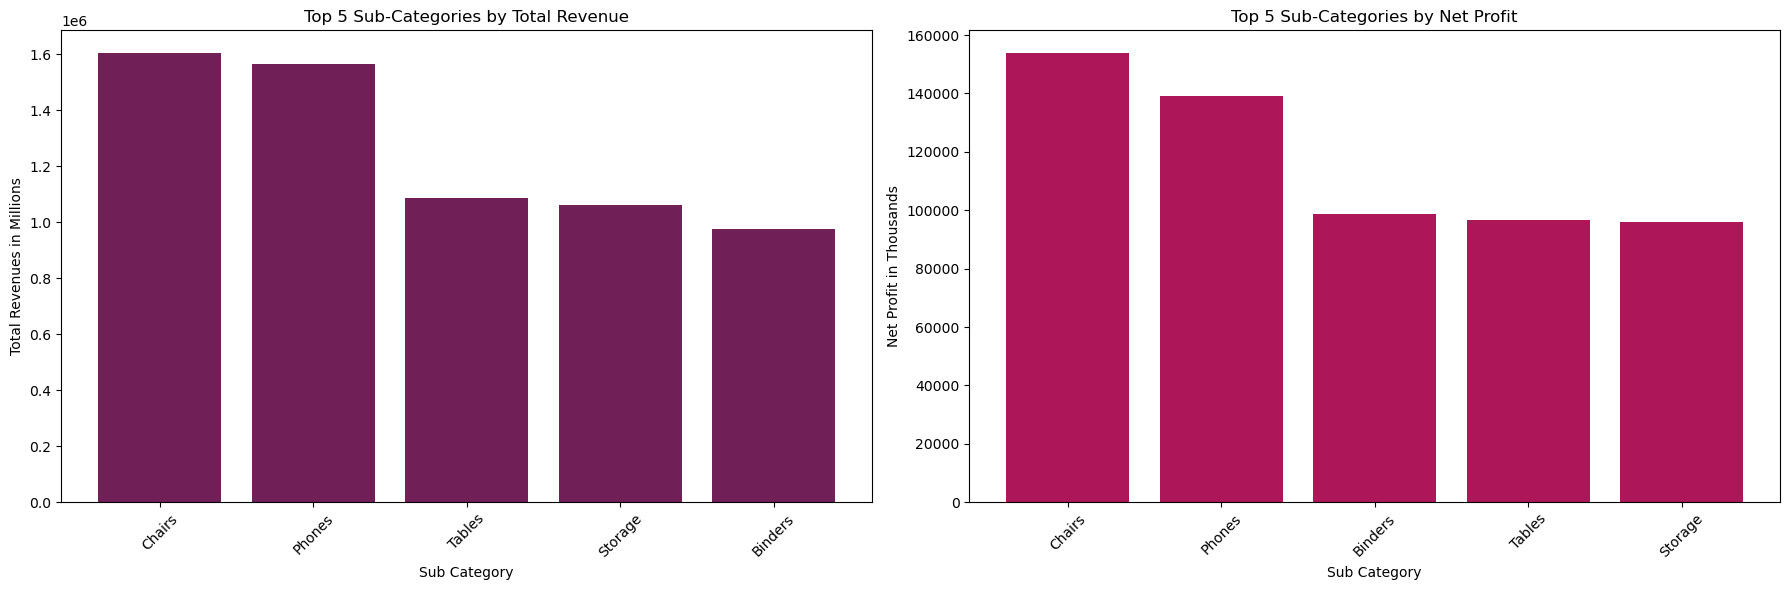

In [36]:
# What are top 5 Sub-categories that drive the most Revenues & Net Profit.

# Get top 5 Sub-Categories by Total Revenue, and Net Profit
top_5_revenue = subcategory_summary.sort_values(by='Total Revenues', ascending=False).head(5)
top_5_profit = subcategory_summary.sort_values(by='Net Profit', ascending=False).head(5)

# Display the results
print("Top 5 Sub-Categories by Total Revenues:\n", top_5_revenue)
print("\nTop 5 Sub-Categories by Net Profit:\n", top_5_profit)

# Plot the Top 5 Sub-Categories by Revenue, and Profit
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
colors = sns.color_palette('rocket')

# Plot Top 5 by Total Revenue
axes[0].bar(top_5_revenue['Sub Category'], top_5_revenue['Total Revenues'], color=colors[1])
axes[0].set_title('Top 5 Sub-Categories by Total Revenue')
axes[0].set_xlabel('Sub Category')
axes[0].set_ylabel('Total Revenues in Millions')
axes[0].tick_params(axis='x', rotation=45)

# Plot Top 5 by Net Profit
axes[1].bar(top_5_profit['Sub Category'], top_5_profit['Net Profit'], color=colors[2])
axes[1].set_title('Top 5 Sub-Categories by Net Profit')
axes[1].set_xlabel('Sub Category')
axes[1].set_ylabel('Net Profit in Thousands')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

                 Quantity
Category                 
Office Supplies     22897
Furniture            8012
Technology           6935


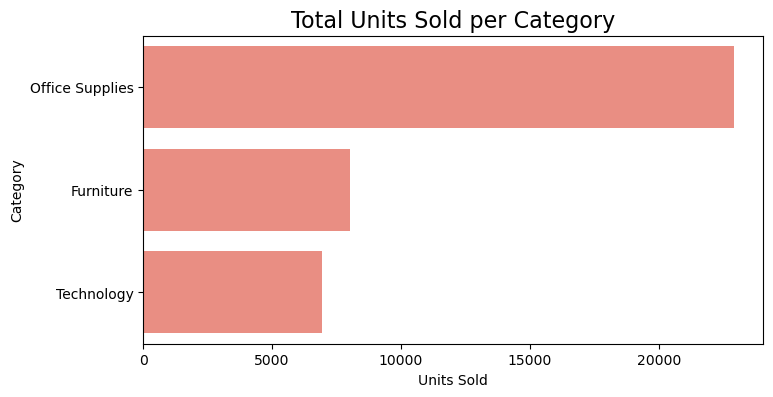

In [38]:
# How many total units sold for each category?
category_quantities = Retail_orders.groupby('Category').agg({'Quantity': 'sum'})
category_quantities.sort_values(by=['Quantity'], inplace=True, ascending=False)
print(category_quantities)

# Create a barplot for Units Sold for each category
plt.figure(figsize=(8,4)) 

sns.barplot(x='Quantity', y='Category', data=category_quantities, color='salmon')

plt.xlabel('Units Sold')
plt.ylabel('Category')
plt.title('Total Units Sold per Category', fontsize=16)

plt.show()

              Quantity
Sub Category          
Binders           5970
Paper             5178
Furnishings       3556
Phones            3285
Storage           3158
Art               3000
Accessories       2976
Chairs            2356
Appliances        1724
Labels            1400
Tables            1232
Fasteners          914
Envelopes          906
Bookcases          868
Supplies           647
Machines           440
Copiers            234


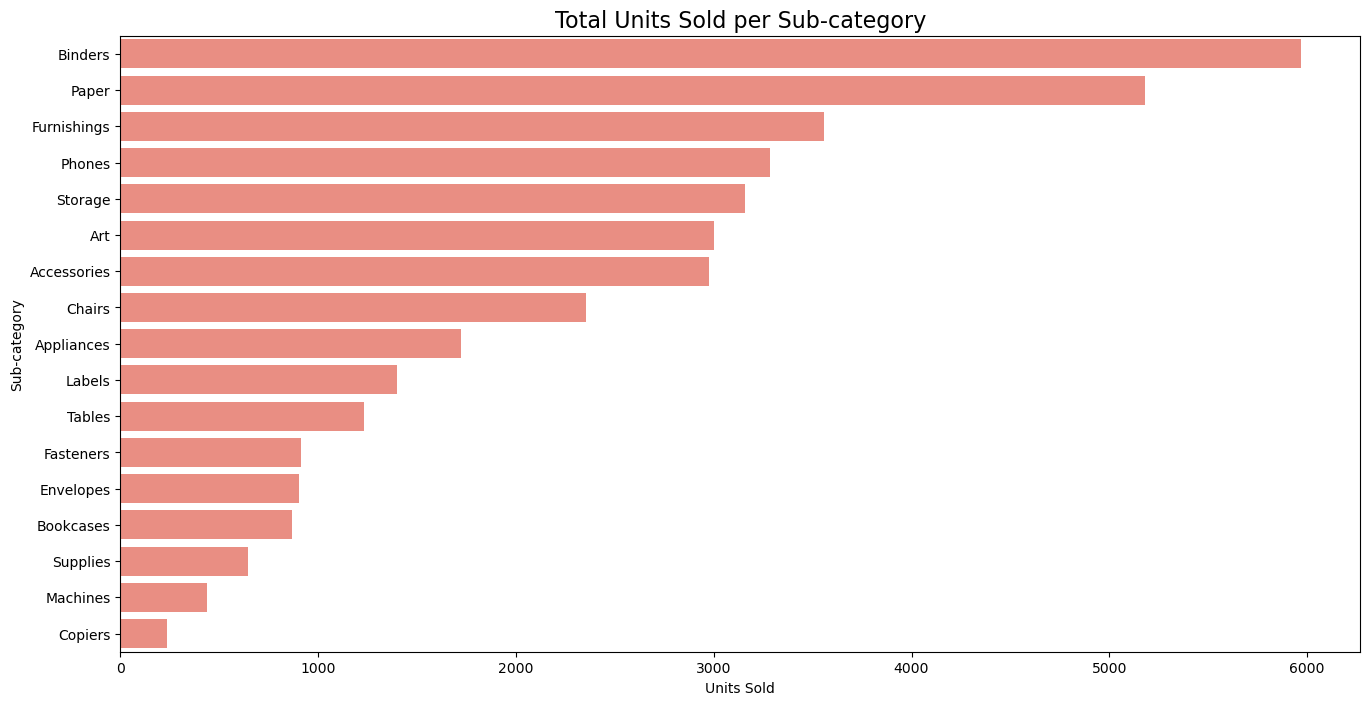

In [40]:
# How many total units sold for each sub-category?
Subcategory_quantities = Retail_orders.groupby('Sub Category').agg({'Quantity': 'sum'})
Subcategory_quantities.sort_values(by=['Quantity'], inplace=True, ascending=False)
print(Subcategory_quantities)

# Create a barplot for Units Sold for each sub-category
plt.figure(figsize=(16,8)) 

sns.barplot(x='Quantity', y='Sub Category', data=Subcategory_quantities, color='salmon')

plt.xlabel('Units Sold')
plt.ylabel('Sub-category')
plt.title('Total Units Sold per Sub-category', fontsize=16)

plt.show()

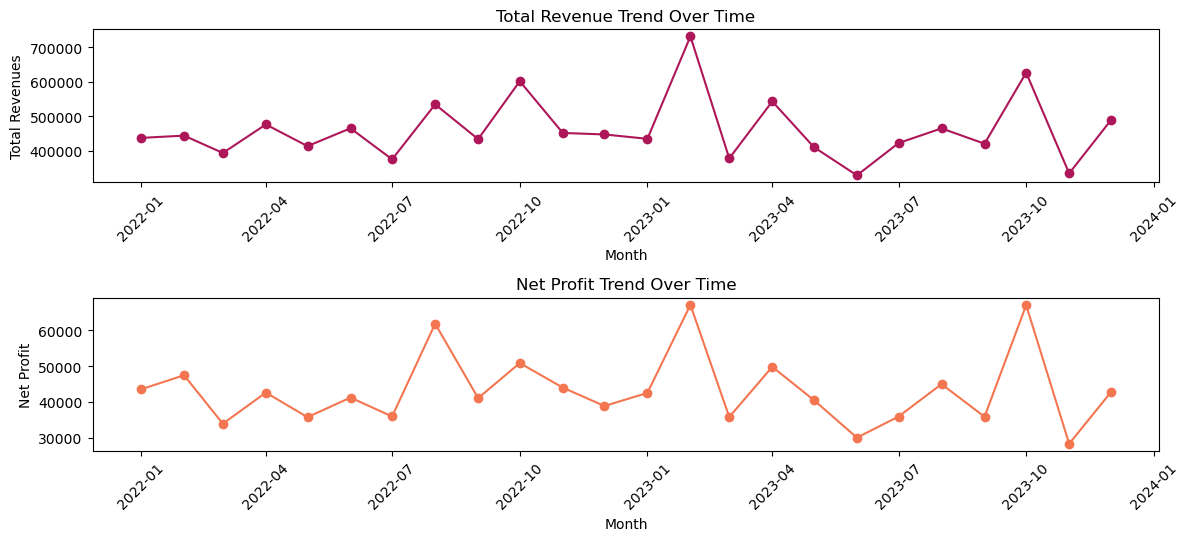

In [42]:
# What are the overall Revenues, Net Profit trend over time? 

# Extract month and year for grouping
Retail_orders['Month'] = Retail_orders['Order Date'].dt.to_period('M')

# Group by Month and calculate total sales, revenue, and profit
monthly_summary = Retail_orders.groupby('Month').agg(
    Total_Revenue=('Total Revenues', 'sum'),
    Net_Profit=('Net Profit', 'sum')
).reset_index()

# Convert 'Month' back to datetime for plotting
monthly_summary['Month'] = monthly_summary['Month'].dt.to_timestamp()

# Create plots for trends over time
plt.figure(figsize=(12, 8))
colors = sns.color_palette('rocket')

# Plot Total Revenue trend
plt.subplot(3, 1, 2)
plt.plot(monthly_summary['Month'], monthly_summary['Total_Revenue'], marker='o', color=colors[2])
plt.title('Total Revenue Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenues')
plt.xticks(rotation=45)

# Plot Net Profit trend
plt.subplot(3, 1, 3)
plt.plot(monthly_summary['Month'], monthly_summary['Net_Profit'], marker='o', color=colors[4])
plt.title('Net Profit Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Analysis of Customer Segments

       Segment  Count
0     Consumer   5187
1    Corporate   3019
2  Home Office   1782


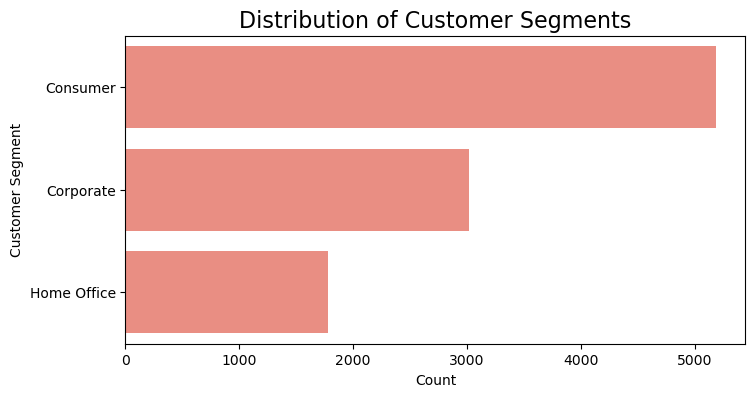

In [45]:
# What is the distribution of customer segments?
segment_distribution = Retail_orders['Segment'].value_counts().reset_index(name='Count')
print(segment_distribution)

# Create a bar chart to visualize the distribution
plt.figure(figsize=(8,4)) 

sns.barplot(x='Count', y='Segment', data=segment_distribution, color='salmon')

plt.xlabel('Count')
plt.ylabel('Customer Segment')
plt.title('Distribution of Customer Segments', fontsize=16)

plt.show()

       Segment  Total Revenues  Net Profit
0     Consumer       5589002.7    512762.7
1    Corporate       3394764.1    330584.1
2  Home Office       2076219.5    194319.5


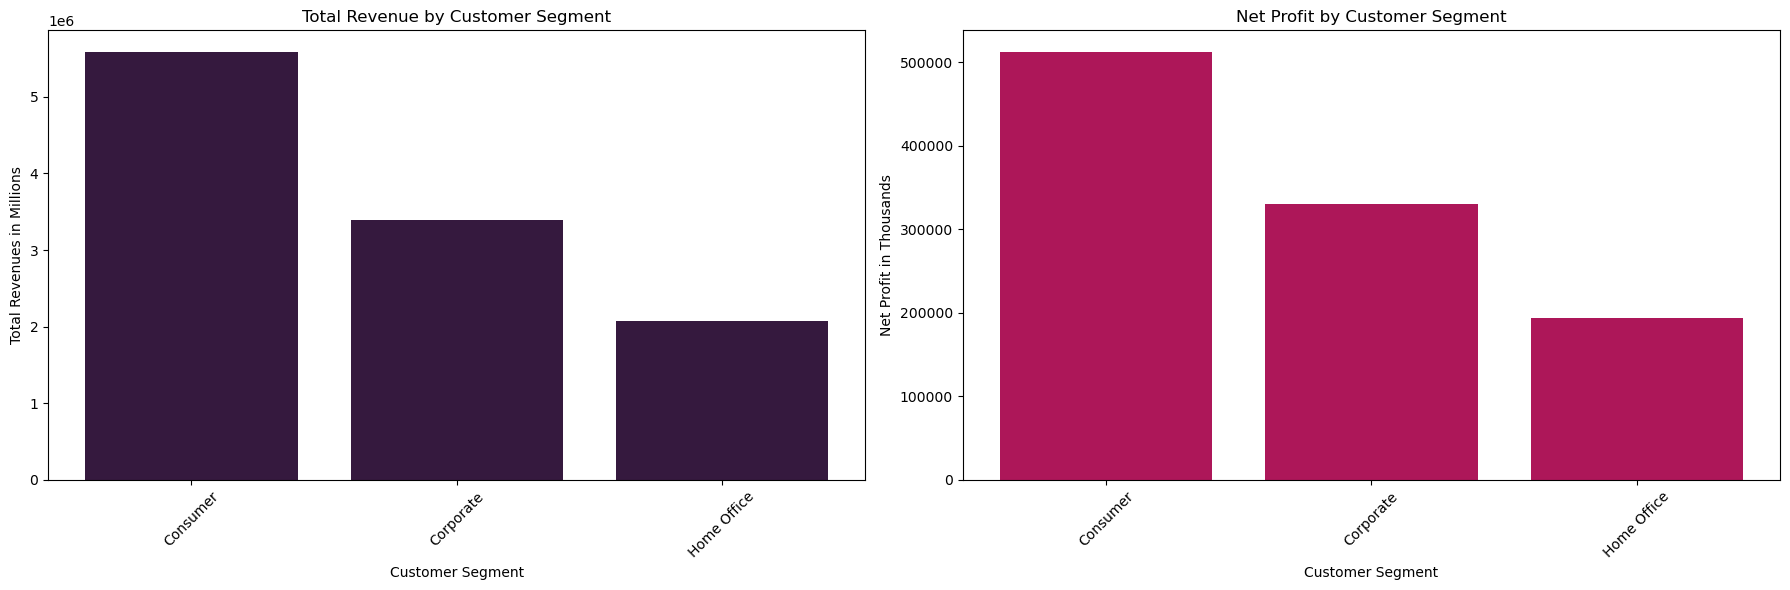

In [47]:
# Which customer segment drive the most Revenues & Net Profit?
segment_summary = Retail_orders.groupby('Segment').agg({'Total Revenues': 'sum', 'Net Profit': 'sum'}).reset_index()
print(segment_summary)

# Create subplots for each metric
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
colors = sns.color_palette('rocket')

# Total Revenues by Segment
axes[0].bar(segment_summary['Segment'], segment_summary['Total Revenues'], color=colors[0])
axes[0].set_title('Total Revenue by Customer Segment')
axes[0].set_xlabel('Customer Segment')
axes[0].set_ylabel('Total Revenues in Millions')
axes[0].tick_params(axis='x', rotation=45)

# Net Profit by Segment
axes[1].bar(segment_summary['Segment'], segment_summary['Net Profit'], color=colors[2])
axes[1].set_title('Net Profit by Customer Segment')
axes[1].set_xlabel('Customer Segment')
axes[1].set_ylabel('Net Profit in Thousands')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

       Segment  Count
0     Consumer   5187
1    Corporate   3019
2  Home Office   1782


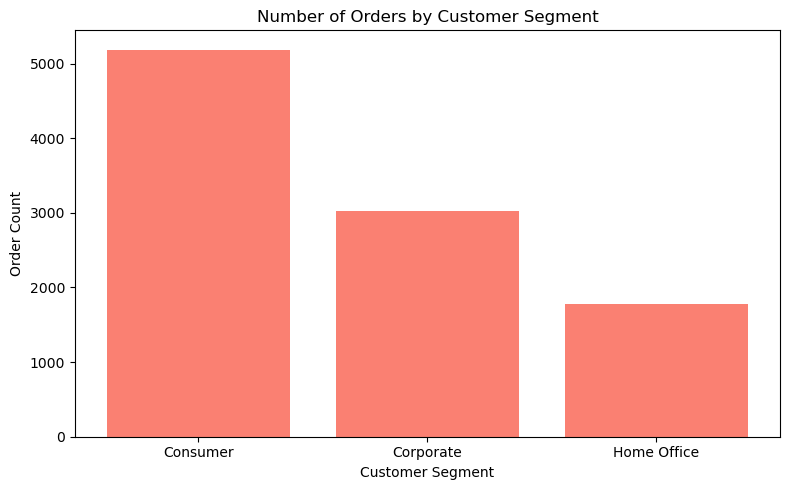

In [49]:
# Which segment place the highest number of orders? 
order_count_by_segment = Retail_orders['Segment'].value_counts().reset_index(name='Count')
print(order_count_by_segment)

# Create a bar chart to visualize the number of orders by segment
plt.figure(figsize=(8, 5))
plt.bar(order_count_by_segment['Segment'], order_count_by_segment['Count'], color='Salmon')
plt.title('Number of Orders by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

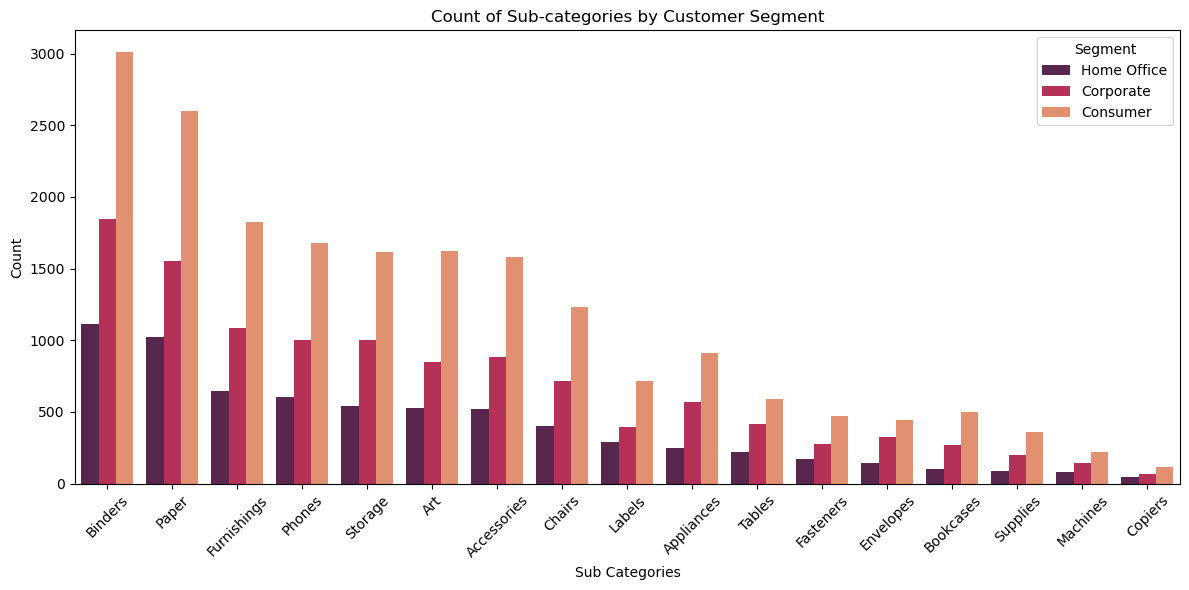

In [51]:
# What are the most bought sub categories by each Customer Segment?
Subcategory_consumers = Retail_orders.groupby(['Segment','Sub Category']).agg({'Quantity': 'sum'})
Subcategory_consumers.sort_values(by=['Segment', 'Quantity'], inplace=True, ascending=False)


# Create a clustered bar plot for Subcategory_consumers
plt.figure(figsize=(12, 6))

sns.barplot(x='Sub Category', y='Quantity', hue='Segment', data=Subcategory_consumers, palette='rocket')

plt.xlabel('Sub Categories')
plt.ylabel('Count')
plt.title('Count of Sub-categories by Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

       Segment  Average_Order_Size
0     Consumer         1077.501966
1    Corporate         1124.466413
2  Home Office         1165.106341


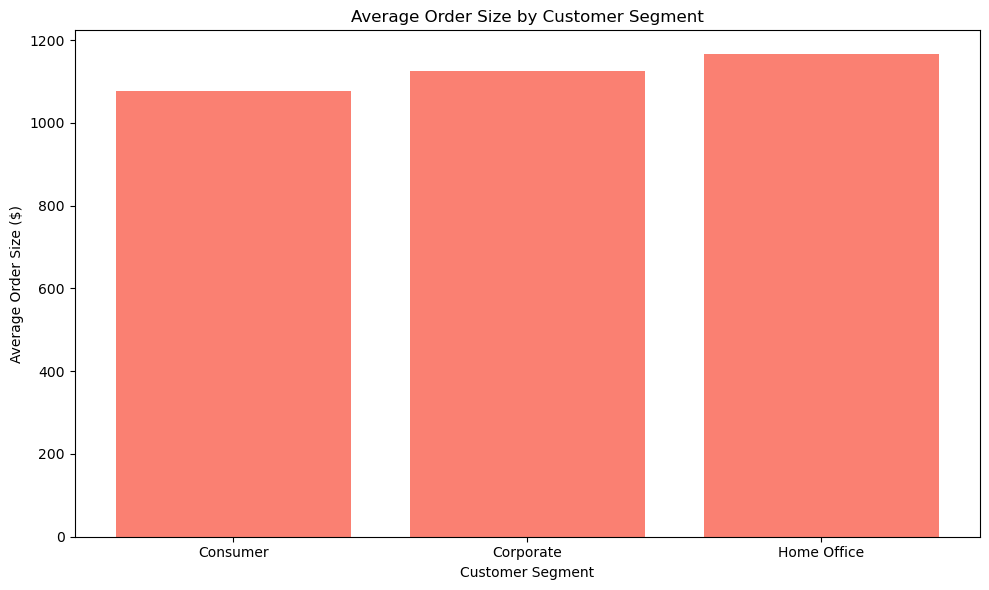

In [53]:
# What is the average order size for each segment?
# Group by 'Segment' to calculate total sales and order count
order_summary = Retail_orders.groupby('Segment').agg(
    Total_Revenues=('Total Revenues', 'sum'),  # Total Sales based on Total Revenue
    Order_Count=('Quantity', 'count')  # Count of orders based on Quantity
).reset_index()

# Calculate average order size
order_summary['Average_Order_Size'] = order_summary['Total_Revenues'] / order_summary['Order_Count']

# Display the segment summary for reference
print(order_summary[['Segment', 'Average_Order_Size']])

# Create a bar chart to visualize the average order size by segment
plt.figure(figsize=(10, 6))
plt.bar(order_summary['Segment'], order_summary['Average_Order_Size'], color='Salmon')
plt.title('Average Order Size by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Order Size ($)')
plt.tight_layout()
plt.show()

## Analysis of regions, states, and cities

In [56]:
# What are the total sales, total revenues, and net profit for different regions?
regions_totals = Retail_orders.groupby('Region').agg({'Total Sales': 'sum', 'Total Revenues': 'sum', 'Net Profit': 'sum'}).reset_index()
regions_totals

,Region,Total Sales,Total Revenues,Net Profit
0,Central,2474680,2387548.7,236088.7
1,East,3378470,3257983.8,295773.8
2,South,2037060,1965901.6,202731.6
3,West,3575010,3448552.2,303072.2


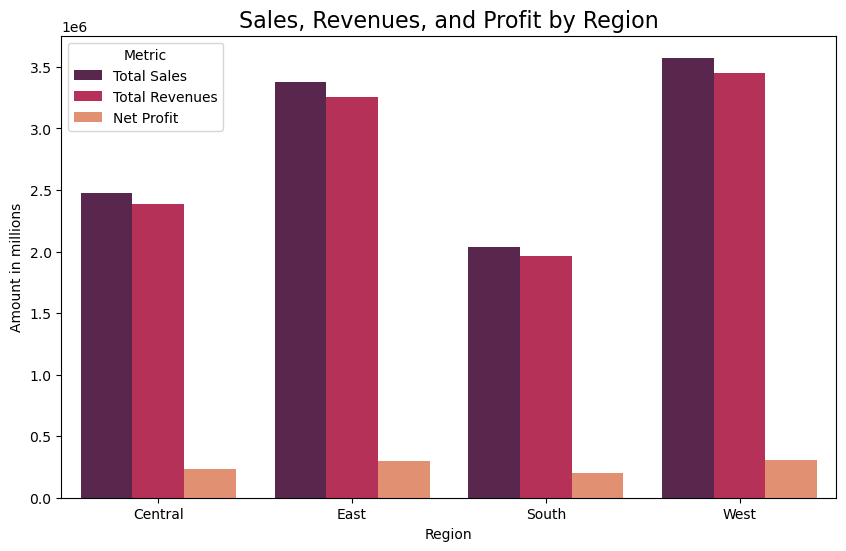

In [58]:
# Create a clustered bar plot for regions_totals
# Melt the DataFrame to long format for Seaborn plotting
regions_totals_melted = regions_totals.melt(id_vars='Region', 
                                value_vars=['Total Sales', 'Total Revenues', 'Net Profit'], 
                                var_name='Metric', value_name='Amount')

plt.figure(figsize=(10, 6))

sns.barplot(x='Region', y='Amount', hue='Metric', data=regions_totals_melted, palette='rocket')

plt.xlabel('Region')
plt.ylabel('Amount in millions')
plt.title('Sales, Revenues, and Profit by Region', fontsize=16)

plt.show()

In [60]:
# What is the Average profit margin for different regions?
# Average Profit Margin by region
avg_profit_margin_by_region = Retail_orders.groupby('Region')['Profit Margin'].mean().reset_index()
print(avg_profit_margin_by_region)

    Region  Profit Margin
0  Central       4.996521
1     East       5.398080
2    South       5.408945
3     West       5.378125


In [62]:
# What is the most demanded sub-category in each region? 
subcat_demand_by_region = Retail_orders.groupby(['Region', 'Sub Category'])['Quantity'].sum()
subcat_demand_by_region = subcat_demand_by_region.reset_index()

# Get the most demanded sub-category in each region
most_demanded_subcat_by_region = subcat_demand_by_region.loc[
    subcat_demand_by_region.groupby('Region')['Quantity'].idxmax()]

print(most_demanded_subcat_by_region)

     Region Sub Category  Quantity
3   Central      Binders      1473
20     East      Binders      1652
37    South      Binders       980
54     West      Binders      1865


In [64]:
# What are the top 10 states that contribute most to revenues?
top_10_states_revenues = Retail_orders.groupby('State').agg({'Total Revenues': 'sum'})
top_10_states_revenues.sort_values(by=['Total Revenues'], inplace=True, ascending=False)
top_10_states_revenues.head(10)

,Total Revenues
State,
California,2200661.7
New York,1503857.1
Texas,804546.7
Washington,668161.2
Pennsylvania,581119.1
Florida,453911.3
Michigan,394727.5
Virginia,364309.2
Illinois,351414.2


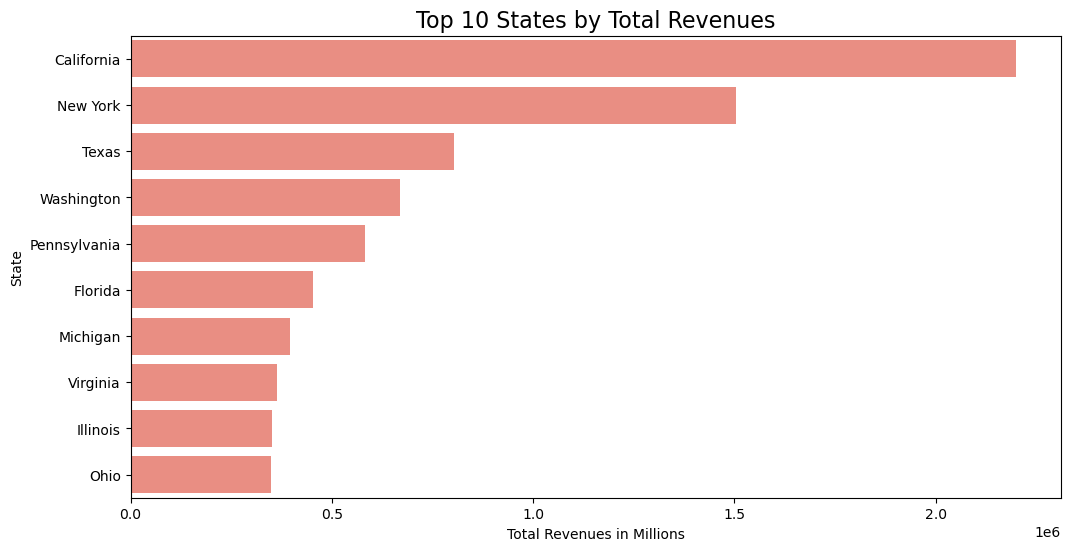

In [66]:
# Create a barplot for top_10_states_revenues
plt.figure(figsize=(12,6)) 

sns.barplot(x='Total Revenues', y='State', data=top_10_states_revenues.head(10), color='salmon')

plt.xlabel('Total Revenues in Millions')
plt.ylabel('State')
plt.title('Top 10 States by Total Revenues', fontsize=16)

plt.show()

In [68]:
# What are the bottom 10 states that least contribute to revenues? 
bottom_10_states_revenues = Retail_orders.groupby('State').agg({'Total Revenues': 'sum'})
bottom_10_states_revenues.sort_values(by='Total Revenues', inplace=True, ascending=False)
bottom_10_states_revenues.tail(10)

,Total Revenues
State,
New Mexico,23416.9
Montana,23032.3
District of Columbia,15336.1
Idaho,13576.6
Kansas,8618.0
Maine,7414.2
Wyoming,6144.0
West Virginia,5793.2
South Dakota,3648.8


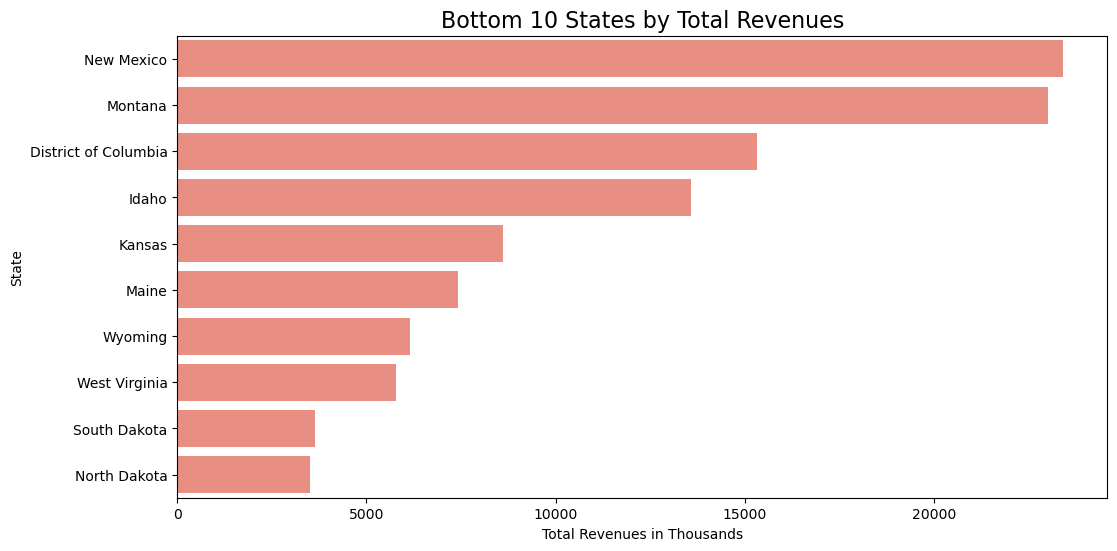

In [70]:
# Create a barplot for bottom_10_states_revenues
plt.figure(figsize=(12,6)) 

sns.barplot(x='Total Revenues', y='State', data=bottom_10_states_revenues.tail(10), color='salmon')

plt.xlabel('Total Revenues in Thousands')
plt.ylabel('State')
plt.title('Bottom 10 States by Total Revenues', fontsize=16)

plt.show()

In [72]:
# What are the top 10 cities that contribute most to revenues? 
top_10_cities_revenues = Retail_orders.groupby('City').agg({'Total Revenues': 'sum'})
top_10_cities_revenues.sort_values(by=['Total Revenues'], inplace=True, ascending=False)
top_10_cities_revenues.head(10)

,Total Revenues
City,
New York City,1218342.6
Los Angeles,823877.4
Seattle,577155.7
Philadelphia,548049.3
San Francisco,522682.6
Houston,295192.9
Detroit,259693.1
San Diego,250068.4
Jacksonville,232950.5


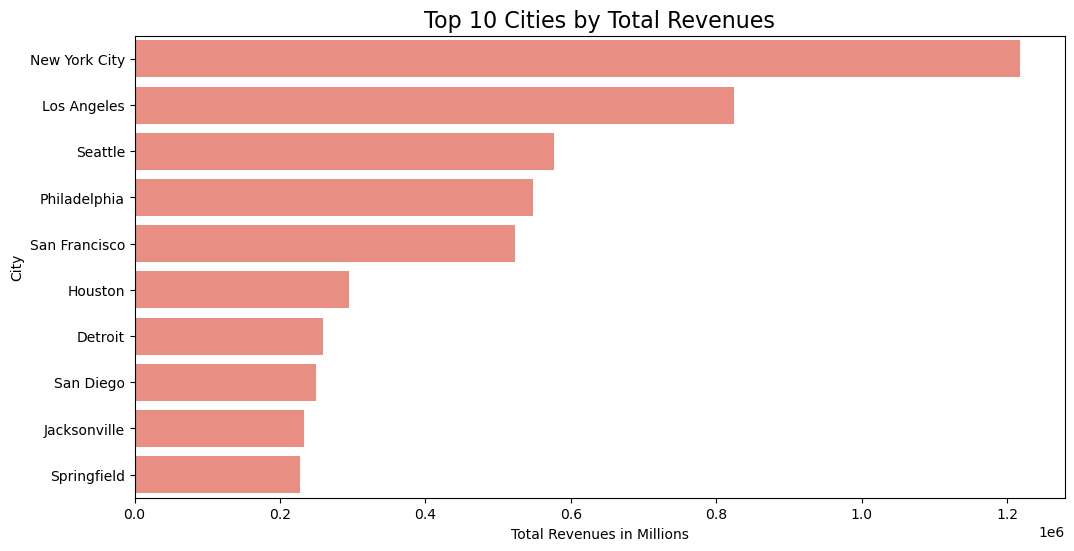

In [74]:
# Create a barplot for top_10_cities_revenues
plt.figure(figsize=(12,6)) 

sns.barplot(x='Total Revenues', y='City', data=top_10_cities_revenues.head(10), color='salmon')

plt.xlabel('Total Revenues in Millions')
plt.ylabel('City')
plt.title('Top 10 Cities by Total Revenues', fontsize=16)

plt.show()

In [76]:
# What are the bottom 10 cities that least contribute to revenues? 
bottom_10_cities_revenues = Retail_orders.groupby('City').agg({'Total Revenues': 'sum'})
bottom_10_cities_revenues.sort_values(by='Total Revenues', inplace=True, ascending=False)
bottom_10_cities_revenues.tail(10)

,Total Revenues
City,
Iowa City,9.8
Port Orange,9.7
Jupiter,0.0
Abilene,0.0
Ormond Beach,0.0
Pensacola,0.0
Elyria,0.0
Springdale,0.0
Layton,0.0


## Analysis of shipping modes

        Ship Mode  Count
0  Standard Class   5962
1    Second Class   1945
2     First Class   1538
3        Same Day    543


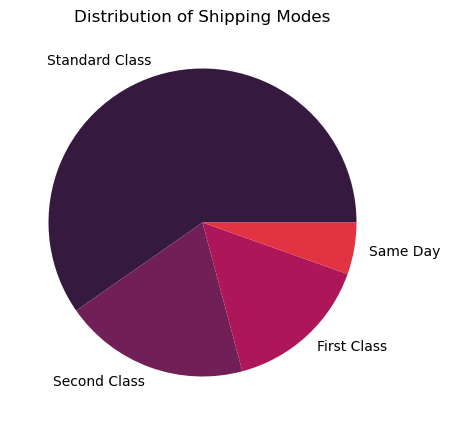

In [79]:
# What is the distribution of shipping modes?
shipping_modes_dist = Retail_orders['Ship Mode'].value_counts().reset_index(name='Count')
print(shipping_modes_dist)

# Create a pie chart for shipping modes
plt.figure(figsize=(5, 5))

colors = sns.color_palette('rocket')
plt.pie(shipping_modes_dist['Count'], labels=shipping_modes_dist['Ship Mode'], colors=colors)

plt.title('Distribution of Shipping Modes')

plt.show()

In [81]:
# What is the distribution of categories for different shipping modes?
cat_by_ship_mode = Retail_orders.groupby(['Ship Mode'])['Category'].value_counts().reset_index(name='Count')
cat_by_ship_mode

,Ship Mode,Category,Count
0,First Class,Office Supplies,910
1,First Class,Furniture,327
2,First Class,Technology,301
3,Same Day,Office Supplies,326
4,Same Day,Furniture,119
5,Same Day,Technology,98
6,Second Class,Office Supplies,1152
7,Second Class,Furniture,427
8,Second Class,Technology,366
9,Standard Class,Office Supplies,3635


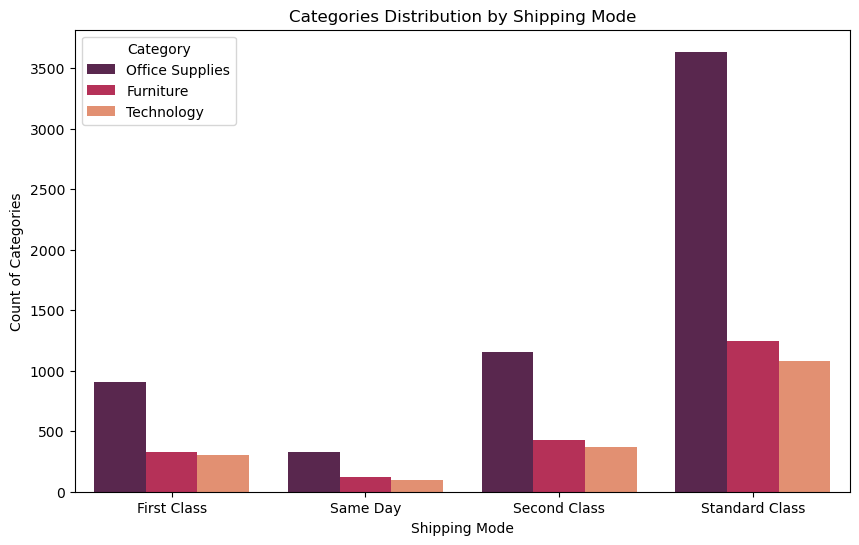

In [83]:
# Create a clustered bar plot for cat_by_ship_mode
plt.figure(figsize=(10, 6))

sns.barplot(x='Ship Mode', y='Count', hue='Category', data=cat_by_ship_mode, palette='rocket')

plt.xlabel('Shipping Mode')
plt.ylabel('Count of Categories')
plt.title('Categories Distribution by Shipping Mode')

plt.show()

In [85]:
# What shipping mode achieved the highest sales?
sales_by_ship_mode = Retail_orders.groupby('Ship Mode').agg({'Total Sales': 'sum'})
sales_by_ship_mode.sort_values(by= ['Total Sales'], inplace=True, ascending=False)
sales_by_ship_mode

,Total Sales
Ship Mode,
Standard Class,6876390
Second Class,2376960
First Class,1624230
Same Day,587640


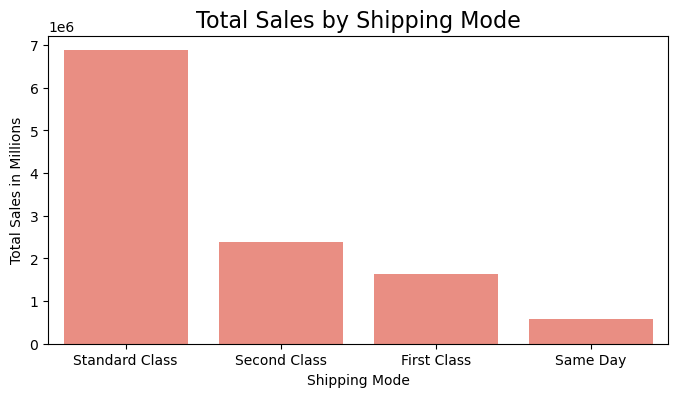

In [87]:
# Create a bar plot for sales_by_ship_mode
plt.figure(figsize=(8, 4))

sns.barplot(x='Ship Mode', y='Total Sales', data=sales_by_ship_mode, color='salmon')

plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales in Millions')
plt.title('Total Sales by Shipping Mode', fontsize=16)

plt.show()